<a href="https://colab.research.google.com/github/abogaziah/cfar10/blob/master/cfar10_arch_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/code')


In [3]:
from clr_callback import *

Using TensorFlow backend.


In [0]:
from lr_finder import *

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
import numpy as np
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import optimizers
from keras import regularizers

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

weight_decay=0.0005

model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32, 32, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

clr = CyclicLR(base_lr=3e-5, max_lr=3e-4,
                                step_size=2812., mode='triangular2')
adam=keras.optimizers.rmsprop(lr=3e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])
history= model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),epochs=50,\
                             steps_per_epoch=x_train.shape[0]//64,\
                             verbose=1,validation_data=(x_valid,y_valid),callbacks=[clr])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
__________

In [0]:
lr_finder.plot_loss()

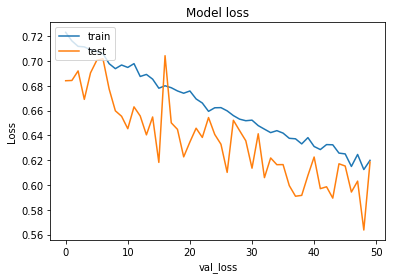

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
from keras.models import load_model

In [0]:
model.save('/content/drive/My Drive/code/my_model.h5')

In [0]:
del model

In [0]:
model = keras.models.load_model('/content/drive/My Drive/code/my_model.h5')

In [0]:
model.summary()

In [41]:
history= model.fit_generator(datagen.flow(x_train, y_train, batch_size=64),epochs=50,\
                             steps_per_epoch=x_train.shape[0]//64,\
                             verbose=1,validation_data=(x_valid,y_valid),callbacks=[clr])


Epoch 1/50
  5/703 [..............................] - ETA: 4:13 - loss: 0.6398 - acc: 0.8250

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.160830). Check your callbacks.
  % delta_t_median)


703/703 [==============================] - 46s 66ms/step - loss: 0.6131 - acc: 0.8236 - val_loss: 0.6019 - val_acc: 0.8390
Epoch 2/50
703/703 [==============================] - 45s 64ms/step - loss: 0.6185 - acc: 0.8247 - val_loss: 0.6209 - val_acc: 0.8354
Epoch 3/50
703/703 [==============================] - 45s 64ms/step - loss: 0.6152 - acc: 0.8221 - val_loss: 0.6290 - val_acc: 0.8318
Epoch 4/50
703/703 [==============================] - 45s 64ms/step - loss: 0.6115 - acc: 0.8259 - val_loss: 0.5944 - val_acc: 0.8410
Epoch 5/50
703/703 [==============================] - 45s 64ms/step - loss: 0.6150 - acc: 0.8225 - val_loss: 0.5893 - val_acc: 0.8436
Epoch 6/50
703/703 [==============================] - 44s 62ms/step - loss: 0.6086 - acc: 0.8253 - val_loss: 0.5894 - val_acc: 0.8426
Epoch 7/50
703/703 [==============================] - 45s 63ms/step - loss: 0.6044 - acc: 0.8286 - val_loss: 0.5711 - val_acc: 0.8476
Epoch 8/50
703/703 [==============================] - 45s 64ms/step - los

KeyboardInterrupt: ignored

In [0]:
h = clr.history
plt.plot(h['lr'])